In [1]:
import pandas as pd
import glob
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
path = glob.glob('raw_data/2016/hourly_weekend/*.csv')
names = path[0].split('/')
months_list = ['jan-mar', 'apr-jun', 'jul-sep', 'oct-dec']
df = pd.DataFrame()
df.name = (f'{names[2]}_{names[1]}')

In [3]:
x = 0
for filepath in path:
    readfile = pd.read_csv(filepath)
    df_x = pd.DataFrame(readfile)
    df_x['month'] = months_list[x]
    df_x['year'] = names[1]
    df = df.append(df_x, ignore_index=True)
    x += 1

In [4]:
df.head()

,sourceid,dstid,hod,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time,month,year
0,45,319,20,1358.25,291.68,1330.15,1.22,jan-mar,2016
1,150,303,0,1178.74,370.54,1135.50,1.29,jan-mar,2016
2,170,103,0,908.53,486.37,830.03,1.47,jan-mar,2016
3,160,203,0,1431.43,317.38,1395.87,1.25,jan-mar,2016
4,20,242,12,1432.17,597.28,1347.93,1.38,jan-mar,2016


In [5]:
geodata = {}
geo = pd.read_json('raw_data/washington_DC_censustracts.json')
for item in geo['features']:
    mid = int(item['properties']['MOVEMENT_ID'])
    address = item['properties']['DISPLAY_NAME']
    coord = item['geometry']['coordinates'][0][0][0]
    #lon = item['geometry']['coordinates'][0][0][0][0]
    geodata[mid] = (address, *coord)

In [ ]:
for ind, row in df.iterrows():

    df.at[ind, 'departure'] = geodata[row['sourceid']][0]
    df.at[ind, 'destination'] = geodata[row['dstid']][0]
    df.at[ind, 'coord_dep'] = (f'{geodata[row["sourceid"]][2]}, {geodata[row["sourceid"]][1]}')
    df.at[ind, 'coord_dest'] = (f'{geodata[row["dstid"]][2]}, {geodata[row["dstid"]][1]}')
    

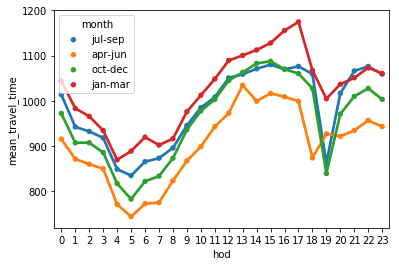

In [6]:
# Visualization of a mean travel time by hour
sns.pointplot(x='hod', y='mean_travel_time', hue='month',
            data=(df[['hod', 'mean_travel_time', 'month']].sample(frac=1)), ci=None, markers='.')

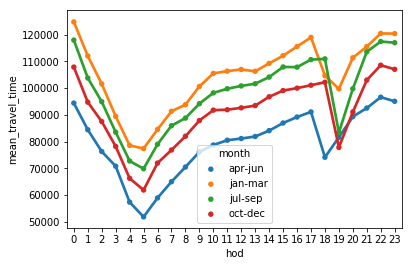

In [7]:
# Visualization of the number of rides by hour
sns.pointplot(x='hod', y='mean_travel_time', hue='month',
                data=(df[['hod', 'mean_travel_time', 'month']].groupby(['month', 'hod']).count().reset_index()),
                ci=None, markers='.')